In [62]:
import numpy as np
import matplotlib.pyplot as pt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import pickle
import PIL

In [78]:
#read the train dataset
data = pd.read_csv("dataset//train.csv")

In [79]:
print("Rows in file : " + str(len(data)))
data.head()

Rows in file : 42000


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
#convert it to an array
data = data.as_matrix()

C:\Miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [81]:
data[0]

array([  1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0, 188, 255,  94,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0, 191, 250, 253,  93,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [82]:
#initialize the classifier
clf = DecisionTreeClassifier()

In [83]:
#split the dataset into train , i take first 35000
xtrain = data[0:35000,1:]  #since first field contains labels for the image we need to take afterwords first field for training 
xtrain_label = data[0:35000,0] #first field contains labels so we take it for labelling

In [84]:
#training dataset
clf = clf.fit(xtrain,xtrain_label)

#then we can save these model for future use, without training we can use it
filename = 'digit_model.pkl'
pk = open(filename,'wb')
pickle.dump(clf,pk)#using pickle we can save anything
pk.close()

In [85]:
#taking rest thing for testing purposes
xtest = data[35000:,1:]
xtest_label = data[35000:,0]

In [87]:
#take one reference in d
d = xtest[550]
d.shape = (28,28) #need to reshape before display in matplotlib
e = xtest[550] #need to take same reference of d for e also..

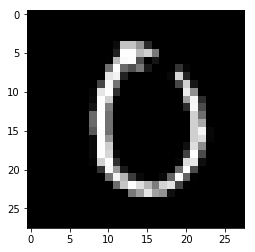

In [88]:
pt.imshow(d,cmap='gray')

In [89]:
#then we can load the saved model for use, without training we can use it
filename = 'digit_model.pkl'
pk = open(filename,'rb')
clf = pickle.load(pk)  #using pickle we can load anything
pk.close()

#predictions
print(clf.predict([e]))

[0]


In [90]:
#for accuracy
all_predictions = clf.predict(xtest)  #it will return an array containing all predicted results
print(all_predictions)
count = 0
for i in range(0,len(xtest)):
    count += 1 if all_predictions[i] == xtest_label[i] else 0  #increment the count when prediction is correct
print(f"No of Succesfull Predictions : {count} out of {len(xtest)}")
print(f"Accuracy : {(count/len(xtest))*100}")  #count the percentage

[2 0 5 ... 7 6 9]
No of Succesfull Predictions : 5992 out of 7000
Accuracy : 85.6
